In [ ]:
from rouge import Rouge
from sacrebleu.metrics import BLEU
from bert_score import score
import pandas as pd

In [2]:
models = ['mistralai/Mistral-7B-Instruct-v0.2',
               'mistralai/Mistral-7B-Instruct-v0.3',
               'mistralai/Mixtral-8x7B-Instruct-v0.1',
               'mistralai/Mixtral-8x22B-Instruct-v0.1',
               'meta-llama/Llama-2-70b-chat-hf',
               'meta-llama/Llama-2-13b-chat-hf',
               'meta-llama/Llama-2-7b-chat-hf',
               'meta-llama/Llama-3-70b-chat-hf',
               'meta-llama/Llama-3-8b-chat-hf',
               'Qwen/Qwen1.5-110B-Chat',
               'Qwen/Qwen1.5-72B-Chat',
               'Qwen/Qwen1.5-14B-Chat',
               'Qwen/Qwen2-72B-Instruct',               
               'google/gemma-7b-it',
               'zero-one-ai/Yi-34B-Chat',
               'openia/gpt-3.5-turbo',
               'garage-bAInd/Platypus2-70B-instruct',
               'lmsys/vicuna-13b-v1.5',
               'lmsys/vicuna-7b-v1.5',
               'openchat/openchat-3.5-1210',
               'WizardLM/WizardLM-13B-V1.2',               
               'upstage/SOLAR-10.7B-Instruct-v1.0',          
               'teknium/OpenHermes-2p5-Mistral-7B'
               ]

# Metrics Evaluation
- ROUGE L
- BLEU
- Bert Score
- Accuracy LLM (GPT4) Evaluation

In [3]:
import pandas as pd
import ast

# Dicionário para armazenar as acurácias
accuracies = {}

for m in models:
    # Extrair o nome do modelo
    model_name = m.split('/')[1]
    
    # Ler o arquivo CSV
    df_m = pd.read_csv(f'result_question_answer_llm_evaluation/{model_name}_QAG_gpt-4o.csv')
    
    # Inicializar contadores
    correct_count = 0
    total_count = len(df_m)
    
    # Iterar sobre as linhas do dataframe
    for index, row in df_m.iterrows():
        # Avaliar o conteúdo JSON da coluna Avaliacao_gpt4
        evaluation = ast.literal_eval(row['Avaliacao_gpt4'])
        
        # Verificar se o resultado é 'CORRETO'
        if evaluation['resultado'] == 'CORRETO':
            correct_count += 1
            
    # Calcular a acurácia
    accuracy = correct_count / total_count if total_count > 0 else 0
    accuracies[model_name] = accuracy

In [4]:
results = []
for m in models:
    model_name = m.split('/')[1]
    df = pd.read_csv(f'result_question_answer_llm_evaluation/{model_name}_QAG_gpt-4o.csv')
    hyps,refs = df['A_model'].values.tolist(),df['A'].values.tolist()
    rouge = Rouge()
    bleu = BLEU()
    print('Calculando para o modelo: ',m)
    scores = rouge.get_scores(hyps, refs, avg=True)
    scoresb = bleu.corpus_score(hyps,[refs])
    # bert score ajustado para neuralmind/bert-large-portuguese-cased
    P, R, F1 = score(hyps, refs, lang="pt",device="cuda",verbose=True)
    
    result = {
        'model':m.split('/')[1],
        'rouge-1': scores['rouge-1']['f'],
        'rouge-2': scores['rouge-2']['f'],
        'Rouge-L': scores['rouge-l']['f'],
        'Bleu': scoresb.score / 100,
        "BS - Precisão": P.mean().item(),
        "BS - Recall": R.mean().item(),
        "Bert Score F1": F1.mean().item(),
        "Acc - GPT4": accuracies[model_name]
    }
    results.append(result)

Calculando para o modelo:  mistralai/Mistral-7B-Instruct-v0.2
O modelo é: neuralmind/bert-large-portuguese-cased
calculating scores...234
computing bert embedding.


100%|██████████| 4/4 [00:02<00:00,  1.77it/s]


computing greedy matching.


100%|██████████| 2/2 [00:00<00:00, 31.19it/s]


done in 2.33 seconds, 43.33 sentences/sec
Calculando para o modelo:  mistralai/Mistral-7B-Instruct-v0.3
O modelo é: neuralmind/bert-large-portuguese-cased
calculating scores...234
computing bert embedding.


100%|██████████| 4/4 [00:01<00:00,  3.11it/s]


computing greedy matching.


100%|██████████| 2/2 [00:00<00:00, 88.58it/s]


done in 1.31 seconds, 76.96 sentences/sec
Calculando para o modelo:  mistralai/Mixtral-8x7B-Instruct-v0.1
O modelo é: neuralmind/bert-large-portuguese-cased
calculating scores...234
computing bert embedding.


100%|██████████| 4/4 [00:01<00:00,  2.87it/s]


computing greedy matching.


100%|██████████| 2/2 [00:00<00:00, 80.52it/s]


done in 1.42 seconds, 71.05 sentences/sec
Calculando para o modelo:  mistralai/Mixtral-8x22B-Instruct-v0.1
O modelo é: neuralmind/bert-large-portuguese-cased
calculating scores...234
computing bert embedding.


100%|██████████| 4/4 [00:01<00:00,  2.62it/s]


computing greedy matching.


100%|██████████| 2/2 [00:00<00:00, 83.51it/s]


done in 1.55 seconds, 65.03 sentences/sec
Calculando para o modelo:  meta-llama/Llama-2-70b-chat-hf
O modelo é: neuralmind/bert-large-portuguese-cased
calculating scores...234
computing bert embedding.


100%|██████████| 4/4 [00:02<00:00,  1.99it/s]


computing greedy matching.


100%|██████████| 2/2 [00:00<00:00, 75.58it/s]


done in 2.04 seconds, 49.43 sentences/sec
Calculando para o modelo:  meta-llama/Llama-2-13b-chat-hf
O modelo é: neuralmind/bert-large-portuguese-cased
calculating scores...234
computing bert embedding.


100%|██████████| 4/4 [00:02<00:00,  1.84it/s]


computing greedy matching.


100%|██████████| 2/2 [00:00<00:00, 81.15it/s]


done in 2.20 seconds, 45.88 sentences/sec
Calculando para o modelo:  meta-llama/Llama-2-7b-chat-hf
O modelo é: neuralmind/bert-large-portuguese-cased
calculating scores...234
computing bert embedding.


100%|██████████| 4/4 [00:02<00:00,  1.69it/s]


computing greedy matching.


100%|██████████| 2/2 [00:00<00:00, 71.69it/s]


done in 2.40 seconds, 42.05 sentences/sec
Calculando para o modelo:  meta-llama/Llama-3-70b-chat-hf
O modelo é: neuralmind/bert-large-portuguese-cased
calculating scores...234
computing bert embedding.


100%|██████████| 3/3 [00:01<00:00,  2.95it/s]


computing greedy matching.


100%|██████████| 2/2 [00:00<00:00, 94.95it/s]


done in 1.04 seconds, 96.91 sentences/sec
Calculando para o modelo:  meta-llama/Llama-3-8b-chat-hf
O modelo é: neuralmind/bert-large-portuguese-cased
calculating scores...234
computing bert embedding.


100%|██████████| 3/3 [00:01<00:00,  2.93it/s]


computing greedy matching.


100%|██████████| 2/2 [00:00<00:00, 90.47it/s]


done in 1.05 seconds, 96.17 sentences/sec
Calculando para o modelo:  Qwen/Qwen1.5-110B-Chat
O modelo é: neuralmind/bert-large-portuguese-cased
calculating scores...234
computing bert embedding.


100%|██████████| 4/4 [00:01<00:00,  2.57it/s]


computing greedy matching.


100%|██████████| 2/2 [00:00<00:00, 80.96it/s]


done in 1.59 seconds, 63.72 sentences/sec
Calculando para o modelo:  Qwen/Qwen1.5-72B-Chat
O modelo é: neuralmind/bert-large-portuguese-cased
calculating scores...234
computing bert embedding.


100%|██████████| 4/4 [00:01<00:00,  3.36it/s]


computing greedy matching.


100%|██████████| 2/2 [00:00<00:00, 60.95it/s]


done in 1.23 seconds, 82.22 sentences/sec
Calculando para o modelo:  Qwen/Qwen1.5-14B-Chat
O modelo é: neuralmind/bert-large-portuguese-cased
calculating scores...234
computing bert embedding.


100%|██████████| 4/4 [00:01<00:00,  3.60it/s]


computing greedy matching.


100%|██████████| 2/2 [00:00<00:00, 87.26it/s]


done in 1.14 seconds, 88.89 sentences/sec
Calculando para o modelo:  Qwen/Qwen2-72B-Instruct
O modelo é: neuralmind/bert-large-portuguese-cased
calculating scores...234
computing bert embedding.


100%|██████████| 4/4 [00:01<00:00,  2.80it/s]


computing greedy matching.


100%|██████████| 2/2 [00:00<00:00, 84.04it/s]


done in 1.46 seconds, 69.39 sentences/sec
Calculando para o modelo:  google/gemma-7b-it
O modelo é: neuralmind/bert-large-portuguese-cased
calculating scores...234
computing bert embedding.


100%|██████████| 4/4 [00:01<00:00,  3.64it/s]


computing greedy matching.


100%|██████████| 2/2 [00:00<00:00, 84.77it/s]


done in 1.13 seconds, 89.70 sentences/sec
Calculando para o modelo:  zero-one-ai/Yi-34B-Chat
O modelo é: neuralmind/bert-large-portuguese-cased
calculating scores...234
computing bert embedding.


100%|██████████| 4/4 [00:01<00:00,  2.38it/s]


computing greedy matching.


100%|██████████| 2/2 [00:00<00:00, 81.04it/s]


done in 1.71 seconds, 59.07 sentences/sec
Calculando para o modelo:  openia/gpt-3.5-turbo
O modelo é: neuralmind/bert-large-portuguese-cased
calculating scores...234
computing bert embedding.


100%|██████████| 4/4 [00:01<00:00,  3.93it/s]


computing greedy matching.


100%|██████████| 2/2 [00:00<00:00, 96.75it/s]


done in 1.04 seconds, 97.02 sentences/sec
Calculando para o modelo:  garage-bAInd/Platypus2-70B-instruct
O modelo é: neuralmind/bert-large-portuguese-cased
calculating scores...234
computing bert embedding.


100%|██████████| 4/4 [00:01<00:00,  2.40it/s]


computing greedy matching.


100%|██████████| 2/2 [00:00<00:00, 87.43it/s]


done in 1.69 seconds, 59.78 sentences/sec
Calculando para o modelo:  lmsys/vicuna-13b-v1.5
O modelo é: neuralmind/bert-large-portuguese-cased
calculating scores...234
computing bert embedding.


100%|██████████| 4/4 [00:01<00:00,  2.72it/s]


computing greedy matching.


100%|██████████| 2/2 [00:00<00:00, 84.58it/s]


done in 1.50 seconds, 67.47 sentences/sec
Calculando para o modelo:  lmsys/vicuna-7b-v1.5
O modelo é: neuralmind/bert-large-portuguese-cased
calculating scores...234
computing bert embedding.


100%|██████████| 4/4 [00:01<00:00,  2.44it/s]


computing greedy matching.


100%|██████████| 2/2 [00:00<00:00, 83.14it/s]


done in 1.66 seconds, 60.72 sentences/sec
Calculando para o modelo:  openchat/openchat-3.5-1210
O modelo é: neuralmind/bert-large-portuguese-cased
calculating scores...234
computing bert embedding.


100%|██████████| 4/4 [00:01<00:00,  3.01it/s]


computing greedy matching.


100%|██████████| 2/2 [00:00<00:00, 90.92it/s]


done in 1.36 seconds, 74.53 sentences/sec
Calculando para o modelo:  WizardLM/WizardLM-13B-V1.2
O modelo é: neuralmind/bert-large-portuguese-cased
calculating scores...234
computing bert embedding.


100%|██████████| 4/4 [00:01<00:00,  2.06it/s]


computing greedy matching.


100%|██████████| 2/2 [00:00<00:00, 85.50it/s]


done in 1.97 seconds, 51.19 sentences/sec
Calculando para o modelo:  upstage/SOLAR-10.7B-Instruct-v1.0
O modelo é: neuralmind/bert-large-portuguese-cased
calculating scores...234
computing bert embedding.


100%|██████████| 4/4 [00:01<00:00,  3.18it/s]


computing greedy matching.


100%|██████████| 2/2 [00:00<00:00, 90.96it/s]


done in 1.28 seconds, 78.64 sentences/sec
Calculando para o modelo:  teknium/OpenHermes-2p5-Mistral-7B
O modelo é: neuralmind/bert-large-portuguese-cased
calculating scores...234
computing bert embedding.


100%|██████████| 4/4 [00:01<00:00,  3.63it/s]


computing greedy matching.


100%|██████████| 2/2 [00:00<00:00, 87.72it/s]

done in 1.13 seconds, 89.50 sentences/sec


# Metrics Graph

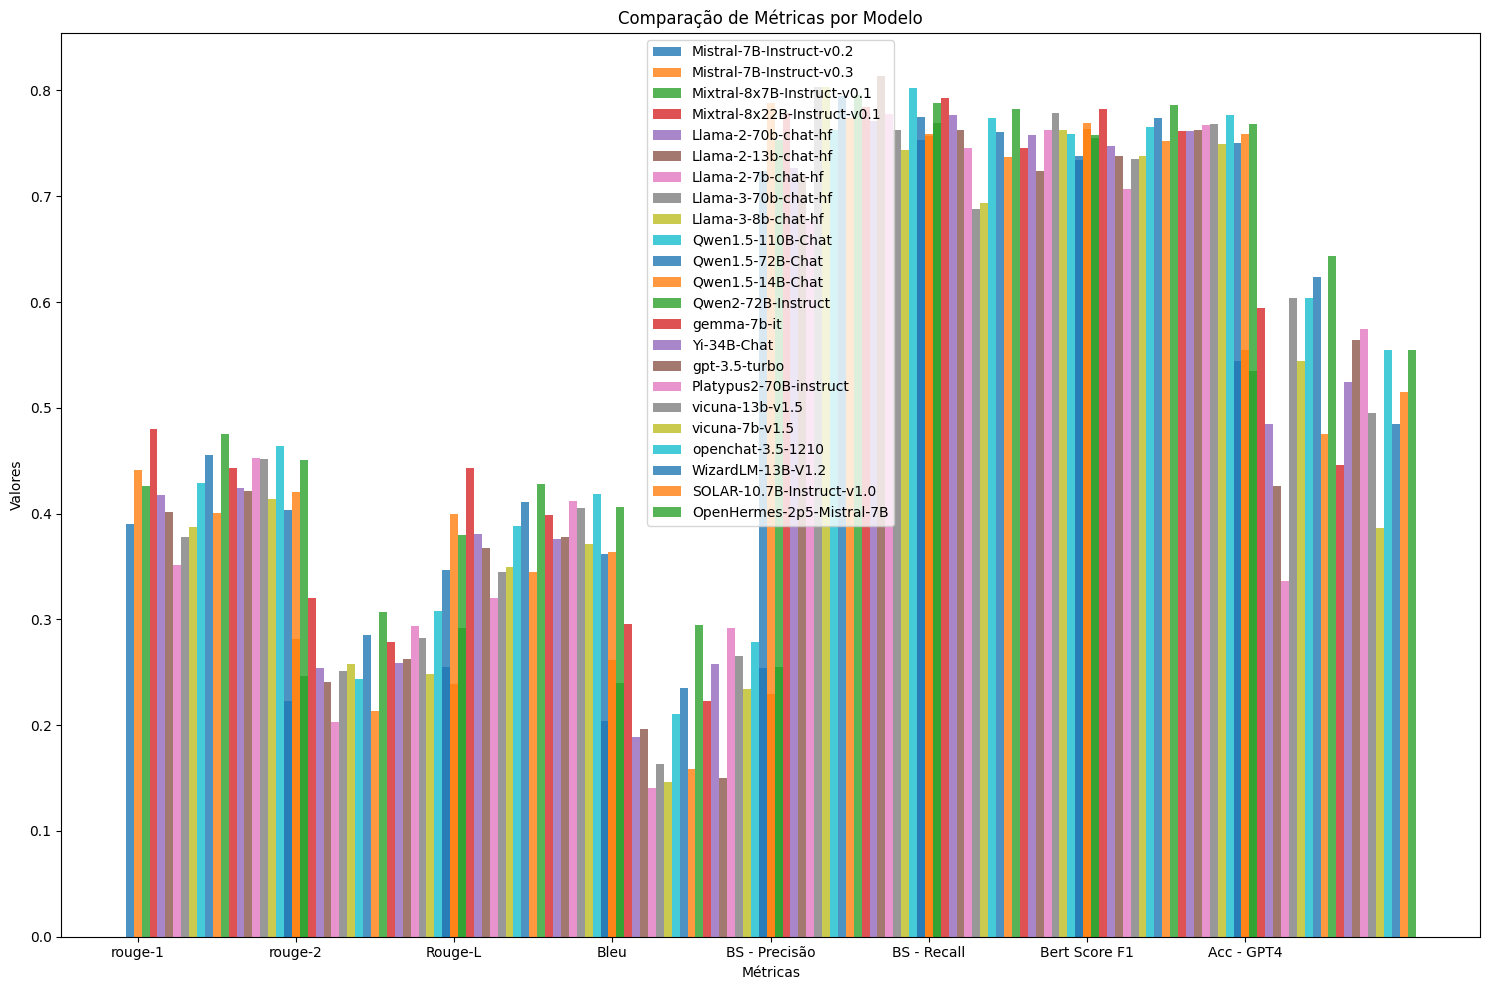

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


results_df = pd.DataFrame(results)

# Define o estilo do gráfico
#plt.style.use('seaborn-darkgrid')

# Define as métricas e modelos
metrics = ['rouge-1', 'rouge-2', 'Rouge-L', 'Bleu', 'BS - Precisão', 'BS - Recall', 'Bert Score F1','Acc - GPT4']
models = results_df['model'].unique()

# Número de grupos de barras
n_groups = len(metrics)

# Cria uma figura
fig, ax = plt.subplots(figsize=(15, 10))

# Índice para cada métrica, para posicionamento das barras
index = np.arange(n_groups)
bar_width = 0.05
opacity = 0.8

# Loop para plotar as barras para cada modelo
for i, model in enumerate(models):
    model_data = results_df[results_df['model'] == model]
    scores = [model_data[metric].values[0] for metric in metrics]
    
    plt.bar(index + i*bar_width, scores, bar_width, alpha=opacity, label=model)

# Adiciona títulos, legendas e rótulos aos eixos
plt.xlabel('Métricas')
plt.ylabel('Valores')
plt.title('Comparação de Métricas por Modelo')
plt.xticks(index + bar_width, metrics)
plt.legend()

# Ajusta o layout
plt.tight_layout()

# Mostra o gráfico
plt.show()


# Metrics Table

In [7]:
import pandas as pd


# Converte os valores para float com duas casas decimais
for metric in ['rouge-1', 'rouge-2', 'Rouge-L', 'Bleu', 'BS - Precisão', 'BS - Recall', 'Bert Score F1','Acc - GPT4']:
    results_df[metric] = results_df[metric].astype(float).round(2)

# Define os modelos como índice do DataFrame para melhor visualização
results_df.set_index('model', inplace=True)

# Exibe a tabela formatada
print(results_df.to_string())

                             rouge-1  rouge-2  Rouge-L  Bleu  BS - Precisão  BS - Recall  Bert Score F1  Acc - GPT4
model                                                                                                              
Mistral-7B-Instruct-v0.2        0.39     0.22     0.35  0.20           0.72         0.75           0.73        0.54
Mistral-7B-Instruct-v0.3        0.44     0.28     0.40  0.26           0.79         0.76           0.77        0.55
Mixtral-8x7B-Instruct-v0.1      0.43     0.25     0.38  0.24           0.75         0.77           0.76        0.53
Mixtral-8x22B-Instruct-v0.1     0.48     0.32     0.44  0.30           0.78         0.79           0.78        0.59
Llama-2-70b-chat-hf             0.42     0.25     0.38  0.19           0.73         0.78           0.75        0.49
Llama-2-13b-chat-hf             0.40     0.24     0.37  0.20           0.72         0.76           0.74        0.43
Llama-2-7b-chat-hf              0.35     0.20     0.32  0.14           0

In [8]:
selected_columns = ['Rouge-L', 'Bleu', 'Bert Score F1', 'Acc - GPT4']
rdf = results_df[selected_columns]
print(rdf.to_string())

                             Rouge-L  Bleu  Bert Score F1  Acc - GPT4
model                                                                
Mistral-7B-Instruct-v0.2        0.35  0.20           0.73        0.54
Mistral-7B-Instruct-v0.3        0.40  0.26           0.77        0.55
Mixtral-8x7B-Instruct-v0.1      0.38  0.24           0.76        0.53
Mixtral-8x22B-Instruct-v0.1     0.44  0.30           0.78        0.59
Llama-2-70b-chat-hf             0.38  0.19           0.75        0.49
Llama-2-13b-chat-hf             0.37  0.20           0.74        0.43
Llama-2-7b-chat-hf              0.32  0.14           0.71        0.34
Llama-3-70b-chat-hf             0.34  0.16           0.74        0.60
Llama-3-8b-chat-hf              0.35  0.15           0.74        0.54
Qwen1.5-110B-Chat               0.39  0.21           0.77        0.60
Qwen1.5-72B-Chat                0.41  0.24           0.77        0.62
Qwen1.5-14B-Chat                0.34  0.16           0.75        0.48
Qwen2-72B-Instruct  

# Metrics Correlation

In [9]:
# Calculando a correlação de Pearson entre todas as métricas
correlation_matrix = rdf.corr(method='pearson')

# Exibindo o DataFrame resultante com as correlações
print(correlation_matrix)

                Rouge-L      Bleu  Bert Score F1  Acc - GPT4
Rouge-L        1.000000  0.821399       0.908195    0.539328
Bleu           0.821399  1.000000       0.780774    0.373167
Bert Score F1  0.908195  0.780774       1.000000    0.657727
Acc - GPT4     0.539328  0.373167       0.657727    1.000000


In [10]:
spearman_correlation_matrix = rdf.corr(method='spearman')
print(spearman_correlation_matrix)

                Rouge-L      Bleu  Bert Score F1  Acc - GPT4
Rouge-L        1.000000  0.804739       0.929734    0.523163
Bleu           0.804739  1.000000       0.808411    0.367468
Bert Score F1  0.929734  0.808411       1.000000    0.608236
Acc - GPT4     0.523163  0.367468       0.608236    1.000000


In [14]:
kendall_correlation = rdf.corr(method='kendall')
print("Kendall Correlation Matrix:\n", kendall_correlation)

Kendall Correlation Matrix:
                 Rouge-L      Bleu  Bert Score F1  Acc - GPT4
Rouge-L        1.000000  0.669556       0.837663    0.393477
Bleu           0.669556  1.000000       0.666361    0.288620
Bert Score F1  0.837663  0.666361       1.000000    0.491279
Acc - GPT4     0.393477  0.288620       0.491279    1.000000


# Metrics Bland-Altman Plot

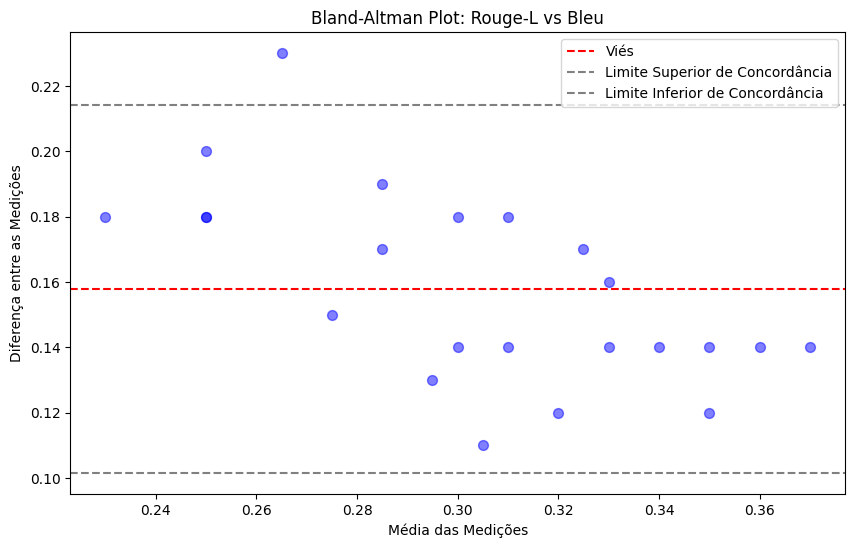

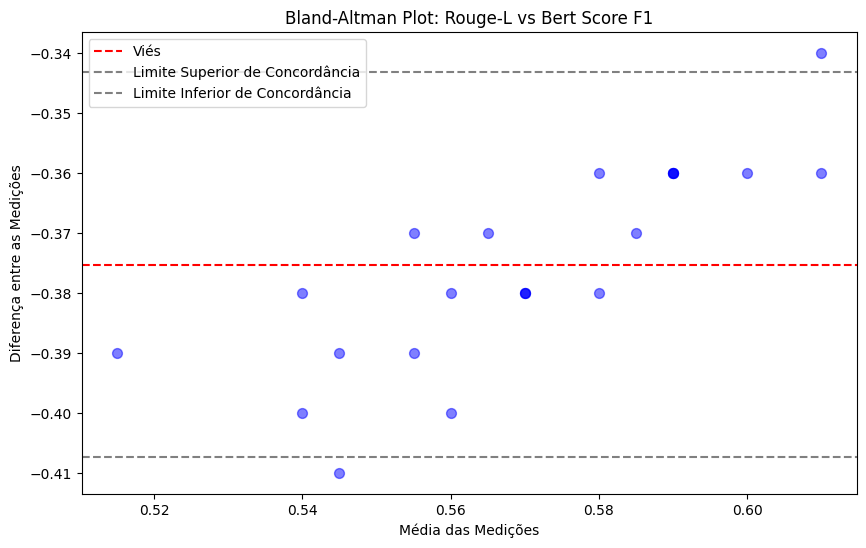

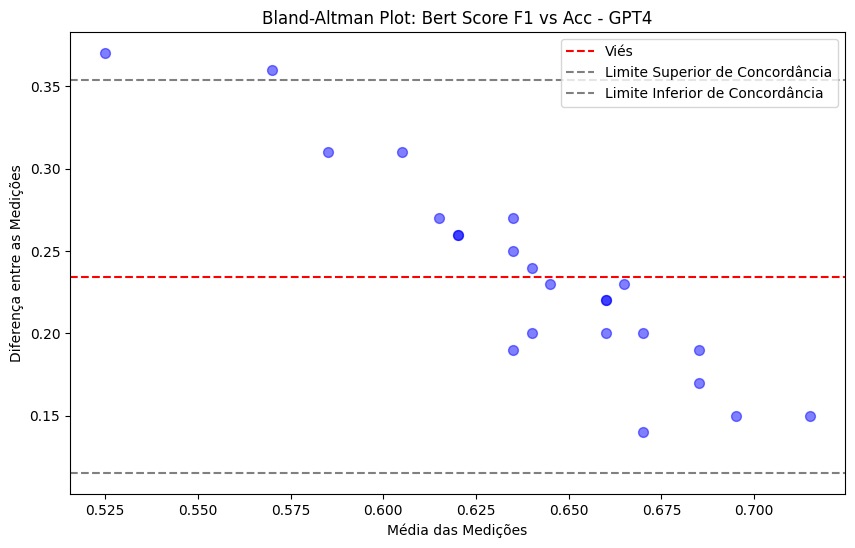

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def bland_altman_plot(data1, data2, title):
    # Calcular médias e diferenças
    means = np.mean([data1, data2], axis=0)
    differences = data1 - data2

    # Calcular viés e limites de concordância
    bias = np.mean(differences)
    std_dev = np.std(differences)
    upper_limit = bias + 1.96 * std_dev
    lower_limit = bias - 1.96 * std_dev

    # Criar o plot
    plt.figure(figsize=(10, 6))
    plt.scatter(means, differences, color='blue', s=50, alpha=0.5)
    plt.axhline(bias, color='red', linestyle='--', label='Viés')
    plt.axhline(upper_limit, color='gray', linestyle='--', label='Limite Superior de Concordância')
    plt.axhline(lower_limit, color='gray', linestyle='--', label='Limite Inferior de Concordância')
    plt.xlabel('Média das Medições')
    plt.ylabel('Diferença entre as Medições')
    plt.title(title)
    plt.legend()
    plt.show()

# Calcular e plotar Bland-Altman plots entre diferentes métricas
bland_altman_plot(rdf['Rouge-L'], rdf['Bleu'], 'Bland-Altman Plot: Rouge-L vs Bleu')
bland_altman_plot(rdf['Rouge-L'], rdf['Bert Score F1'], 'Bland-Altman Plot: Rouge-L vs Bert Score F1')
bland_altman_plot(rdf['Bert Score F1'], rdf['Acc - GPT4'], 'Bland-Altman Plot: Bert Score F1 vs Acc - GPT4')
